In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)


In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# Drop features that are not going to be use in the model

df1 = df.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df1.groupby('bath')['bath'].count()

bath
1.0      788
2.0     6908
3.0     3286
4.0     1226
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
11.0       3
12.0       7
13.0       3
14.0       1
15.0       1
16.0       2
18.0       1
27.0       1
40.0       1
Name: bath, dtype: int64

In [8]:
# Check to see if the outlier data is valid or an error
df1.loc[df1['bath'] == 40]

,location,size,total_sqft,bath,price
4684,Munnekollal,43 Bedroom,2400,40.0,660.0


In [9]:
df2 = df1.dropna()
df2.shape

(13246, 5)

In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
# Clean the data by standardizing the size column into integers

df2['bedrooms'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))
df2.head()

C:\Users\ahmad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df2['bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
# Create a function to check if all data in the total_sqft column is a float

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
# use '~' as a negation to find data that are not a float

df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [16]:
# Create a function to convert this range type data to a float that is the average of both values

def convert_range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_range_to_num)
df3.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [18]:
df3.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bedrooms              4
Name: 30, dtype: object

In [19]:
df4 = df3.copy()

In [20]:
df4['price_per_sqft'] = df['price']*1000000/df4['total_sqft']

In [21]:
df4.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000


In [22]:
len(df4.location.unique())

1304

In [23]:
df4.location = df4.location.apply(lambda x : x.strip())

location_stats = df4.groupby('location')['location'].count().sort_values(ascending = False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [24]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [25]:
len(df4.location.unique())

1293

In [26]:
# Create a new value 'other' that will include all location that has less than 10 occurrences

df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [27]:
df4.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000


In [28]:
df4.shape

(13246, 7)

In [29]:
# Assuming typical bedroom sqft is never less than 300, remove these outliers from the data

df5 = df4[~(df4.total_sqft/df4.bedrooms <= 300)]
df5.shape

(12320, 7)

In [30]:
# Check the statistics on price_per_sqft to see there is any outlier in the data

df5.price_per_sqft.describe()

count    1.227400e+04
mean     6.211880e+04
std      4.053215e+04
min      2.678298e+03
25%      4.200000e+04
50%      5.263158e+04
75%      6.825475e+04
max      1.764706e+06
Name: price_per_sqft, dtype: float64

In [31]:
# Create a function to remove any data that has price_per_sqft falls outside of the range of standard deviation

def remove_price_per_sqft_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <+ (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df6 = remove_price_per_sqft_outlier(df5)
df6.shape

(10016, 7)

In [32]:
# Create a plot to study some outliers which are houses with higher price per sqft even though they have less bedrooms

def plot_scatter_chart(df,location):
    bdr2 = df[(df.location == location) & (df.bedrooms == 2)]
    bdr3 = df[(df.location == location) & (df.bedrooms == 3)]
    matplotlib.rcParams['figure.figsize'] = (20,10)
    plt.scatter(bdr2.total_sqft, bdr2.price_per_sqft, color = 'red', marker = '*', label = '2 Bdr', s = 50)
    plt.scatter(bdr3.total_sqft, bdr3.price_per_sqft, color = 'blue', marker = '+', label = '3 Bdr', s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price per Square Feet')
    plt.title(location)
    plt.legend()

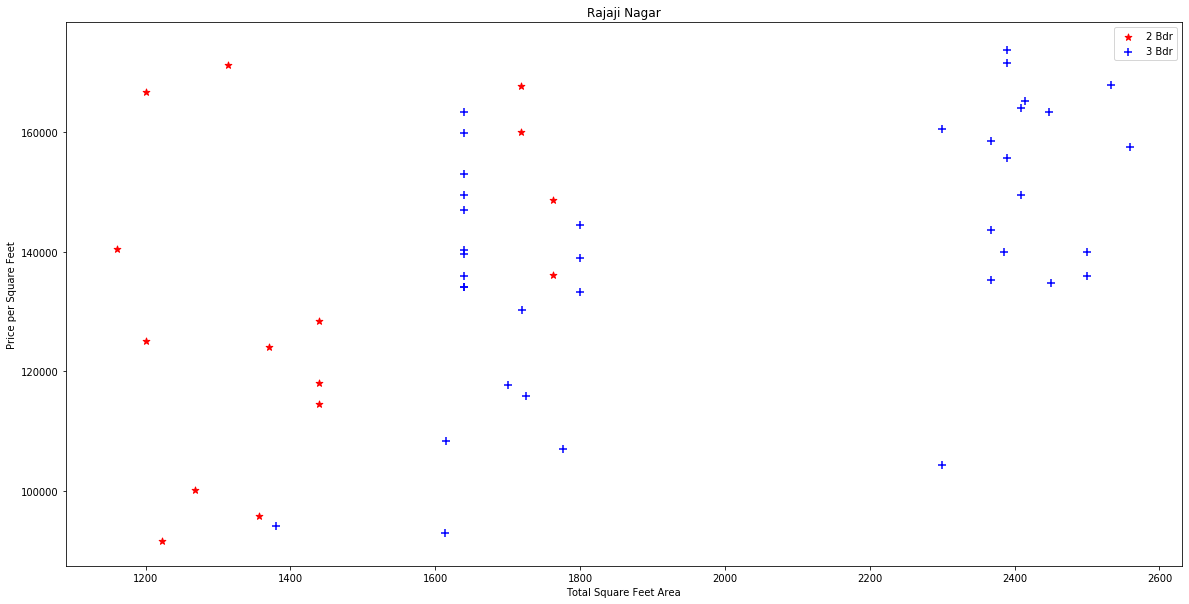

In [33]:
plot_scatter_chart(df6, 'Rajaji Nagar')

In [34]:
# Create a function to remove these outliers

def remove_bdr_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bdr_stats = {}
        for bdr, bdr_df in location_df.groupby('bedrooms'):
            bdr_stats[bdr] = {
                'mean' : np.mean(bdr_df.price_per_sqft),
                'std' : np.std(bdr_df.price_per_sqft),
                'count': bdr_df.shape[0]
            }
        for bdr, bdr_df in location_df.groupby('bedrooms'):
            stats = bdr_stats.get(bdr-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bdr_df[bdr_df.price_per_sqft <(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')
        

df7 = remove_bdr_outliers(df6)
df7.shape

(7164, 7)

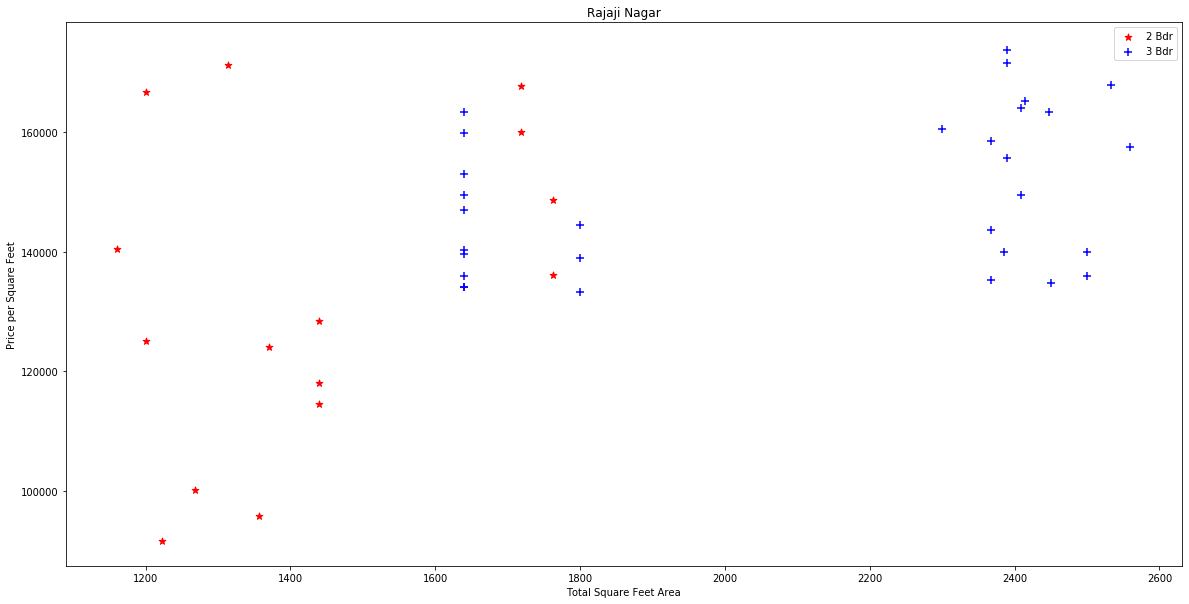

In [35]:
plot_scatter_chart(df7, 'Rajaji Nagar')

In [36]:
# Check outliers on the Bathroom numbers data >> Assume bathrooms number are never greater than bedrooms number + 2

df7[df7.bath > df7.bedrooms + 2].sort_values(by = 'bath', ascending = False)
    

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
8232,other,6 BHK,11338.0,9.0,1000.0,6,88198.976892
5099,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,64285.714286
1565,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,32520.325203
6562,Thanisandra,3 BHK,1806.0,6.0,116.0,3,64230.343300


In [37]:
df8 = df7[~(df7.bath > df7.bedrooms + 2)]
df8.shape

(7160, 7)

In [38]:
df9 = df8.drop(['size', 'price_per_sqft'], axis = 'columns')
df9.head()

,location,total_sqft,bath,price,bedrooms
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [39]:
# Assign dummy column for the categorical column location so that we can perform machine learning model on the data

dummies = pd.get_dummies(df9.location)

In [40]:
df10 = pd.concat([df9, dummies.drop('other', axis = 'columns')], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Assign features and targets from the dataframe for preparation of the model training

x = df10.drop(['price','location'], axis = 'columns')
y = df10.price

In [42]:
# Use train_test_split to split the data for testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [43]:
# Try model using Linear Regression

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_model.score(x_test, y_test)

0.8878572192899561

In [44]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv =  ShuffleSplit(n_splits = 5 , test_size= 0.2, random_state = 0)

cross_val_score(LinearRegression(), x, y, cv = cv)

array([0.88785722, 0.85130381, 0.7823656 , 0.86401959, 0.84409335])

In [45]:
# Create a function that use GridSearchCV to find the best model and parameters for the prediction model

from sklearn.model_selection import GridSearchCV
    
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gs(x,y):
    algos = {
        'linear_regression': {
            'model' : LinearRegression(),
            'params': {
                'normalize' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha' : [1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree' : {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores=[]
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])




In [46]:
# Based on the function, we can see that Linear Regression is the best model for this dataset

find_best_model_using_gs(x,y)

,model,best_score,best_params
0,linear_regression,0.853789,{'normalize': False}
1,lasso,0.704385,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.765669,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [47]:
# Use linear Regression model to create a function that wil predict the housing price in Bangalore based on the Location,total area in sqft, no. of Bathrooms and also no. of Bedrooms.

def predict_price(location, sqft, bath, bedrooms):
    try:
        loc_index = np.where(x.columns == location)[0][0]
    except:
        pass

    
    a = np.zeros(len(x.columns))
    a[0] = sqft
    a[1] = bath
    a[2] = bedrooms
    try:
        if loc_index >= 0:
            a[loc_index] = 1
    except:
        pass
        
    return lr_model.predict([a])[0]

In [48]:
predict_price('Other', 2000, 3, 4)

156.97040396547902

In [49]:
predict_price('Indira Nagar', 2000, 3, 4)

266.21102394260316

In [50]:
def predict(location, sqft, bath, bedrooms):
    try:
        loc_index = np.where(x.columns == location)[0][0]
    except:
        pass
    
    a = np.zeros(len(x.columns))
    a[0] = sqft
    a[1] = bath
    a[2] = bedrooms
    try:
        if loc_index >= 0:
            a[loc_index] = 1
    except:
        pass
        
    return ([a])[0]

In [51]:
predict('Indira Other', 2000, 3, 4)

array([2000.,    3.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [52]:
    loc_index = np.where(x.columns == 'other')[0][0]
    loc_index

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
predict('other', 2000, 3, 4)